In [ ]:
import numpy as np
import pylab as pl
import scipy as sp
import json
import csv
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

pl.rcParams.update({
    'text.usetex': False,      # IMPORTANT
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'mathtext.fontset': 'stix' # good math fonts without LaTeX
})

# Input your own file path to https://github.com/vanferdi/resource-rational-prediction/blob/main/Data/experiment.csv
file_path = 'experiment.csv'

Inputs = []
Guesses = []
ParticipantIDs = []
Input_Types = []
Hidden_states = []
Accuracy = []
Bonus_round = []

with open(file_path) as csvfile:
		spamreader = csv.reader(csvfile)
		for row in spamreader:
			input_ = row[7]
			guess_ = row[6]
			ID = row[0]
			hmm_states = row[13]
			accuracy = row[22]
			bonus_round = row[29]
			Inputs.append(input_)
			Guesses.append(guess_)
			ParticipantIDs.append(ID)
			Input_Types.append(row[15])
			Hidden_states.append(hmm_states)
			Accuracy.append(accuracy)
			Bonus_round.append(bonus_round)
		Inputs.pop(0)
		Guesses.pop(0)
		ParticipantIDs.pop(0)
		Input_Types.pop(0)
		Hidden_states.pop(0)
		Accuracy.pop(0)
		Bonus_round.pop(0)

(array([ 3., 65., 27., 19., 12.,  4.,  2.,  0.,  2.,  6.]),
 array([  56. ,  320.4,  584.8,  849.2, 1113.6, 1378. , 1642.4, 1906.8,
        2171.2, 2435.6, 2700. ]),
 <BarContainer object of 10 artists>)

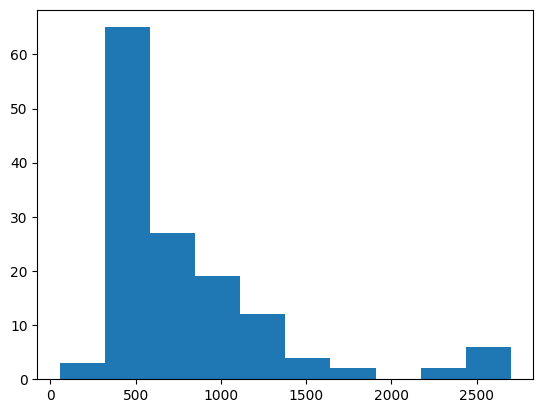

In [ ]:
pl.hist([len(guess) for guess in Guesses])

In [ ]:
# need to find out who the early stoppers are
double_earlystoppers = []
even_earlystoppers = []
noisy_earlystoppers = []
for i in range(len(ParticipantIDs)):
  # get if someone is an early stopper
  m = len(Guesses[i])
  input_type = Input_Types[i]
  if input_type=='Clumpy':
    if m<200:
      double_earlystoppers.append(True)
    else:
      double_earlystoppers.append(False)
  elif input_type=='NoisyPeriodic':
    if m<200:
      noisy_earlystoppers.append(True)
    else:
      noisy_earlystoppers.append(False)
  else:
    if m<200:
      even_earlystoppers.append(True)
    else:
      even_earlystoppers.append(False)

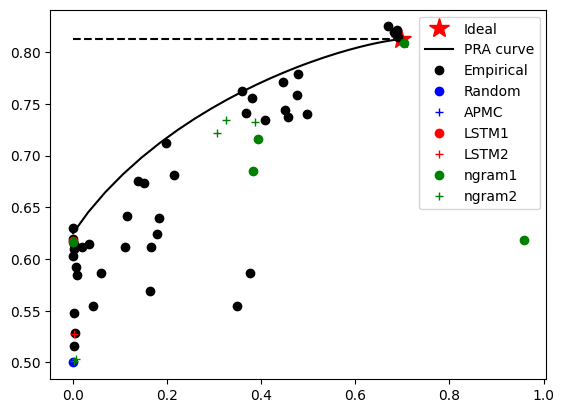

In [ ]:
doublePRA = np.load('DoubleProcess_PRA.npz')
double_Rparticipant = doublePRA['R_participant']
double_Aparticipant = doublePRA['D_participant']
double_R = doublePRA['Rs']
double_A = doublePRA['Ds']
# add in all the controls
double_Rrandom = [0]; double_Arandom = [0.5]
double_Rargmax = [0]; double_Aargmax = [0.6140888208269525]
double_RLSTM_noprobmatching = [0]; double_ALSTM_noprobmatching = [0.6172839506172839]
double_RLSTM_probmatching = [0.0014496922214584096]; double_ALSTM_probmatching = [0.5277777777777778]
double_Rngram_noprobmatching = [0.0,0.9583015836671662,0.7030778604454733,0.38164381118861623,0.3928748672364626]
double_Rngram_probmatching = [0.006863705450984359,0.001290502461923193,0.3867524842481873,0.30636367649534213,0.32508958775591257]
double_Angram_noprobmatching = [0.6165644171779141,0.6184615384615385,0.8092307692307692,0.6851851851851852,0.7160493827160493]
double_Angram_probmatching = [0.5030674846625767,0.501538461538461,0.7323076923076923,0.722222222222222,0.7345679012345679]
pl.plot(np.max(double_R),np.max(double_A),'*r',label='Ideal',markersize=15)
pl.plot(np.linspace(0,np.max(double_R),100),np.ones(100)*np.max(double_A),'--k')
pl.plot(double_R,double_A,'-k',label='PRA curve')
pl.plot(double_Rparticipant,double_Aparticipant,'ok',label='Empirical')
pl.plot(double_Rrandom,double_Arandom,'ob',label='Random')
pl.plot(double_Rargmax,double_Aargmax,'+b',label='APMC')
pl.plot(double_RLSTM_noprobmatching,double_ALSTM_noprobmatching,'or',label='LSTM1')
pl.plot(double_RLSTM_probmatching,double_ALSTM_probmatching,'+r',label='LSTM2')
pl.plot(double_Rngram_noprobmatching,double_Angram_noprobmatching,'og',label='ngram1')
pl.plot(double_Rngram_probmatching,double_Angram_probmatching,'+g',label='ngram2')
pl.legend(loc='best')
pl.show()

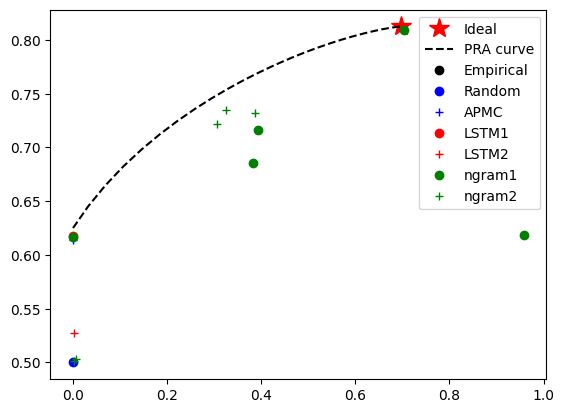

In [ ]:
doublePRA = np.load('DoubleProcess_PRA.npz')
double_Rparticipant = doublePRA['R_participant']
double_Aparticipant = doublePRA['D_participant']
double_Rparticipantearly = []
double_Aparticipantearly = []
for i in range(len(double_Rparticipant)):
  if double_earlystoppers[i]:
    double_Rparticipantearly.append(double_Rparticipant[i])
    double_Aparticipantearly.append(double_Aparticipant[i])
double_R = doublePRA['Rs']
double_A = doublePRA['Ds']
# add in all the controls
double_Rrandom = [0]; double_Arandom = [0.5]
double_Rargmax = [0]; double_Aargmax = [0.6140888208269525]
double_RLSTM_noprobmatching = [0]; double_ALSTM_noprobmatching = [0.6172839506172839]
double_RLSTM_probmatching = [0.0014496922214584096]; double_ALSTM_probmatching = [0.5277777777777778]
double_Rngram_noprobmatching = [0.0,0.9583015836671662,0.7030778604454733,0.38164381118861623,0.3928748672364626]
double_Rngram_probmatching = [0.006863705450984359,0.001290502461923193,0.3867524842481873,0.30636367649534213,0.32508958775591257]
double_Angram_noprobmatching = [0.6165644171779141,0.6184615384615385,0.8092307692307692,0.6851851851851852,0.7160493827160493]
double_Angram_probmatching = [0.5030674846625767,0.501538461538461,0.7323076923076923,0.722222222222222,0.7345679012345679]
pl.plot(np.max(double_R),np.max(double_A),'*r',label='Ideal',markersize=15)
pl.plot(double_R,double_A,'--k',label='PRA curve')
pl.plot(double_Rparticipantearly,double_Aparticipantearly,'ok',label='Empirical')
pl.plot(double_Rrandom,double_Arandom,'ob',label='Random')
pl.plot(double_Rargmax,double_Aargmax,'+b',label='APMC')
pl.plot(double_RLSTM_noprobmatching,double_ALSTM_noprobmatching,'or',label='LSTM1')
pl.plot(double_RLSTM_probmatching,double_ALSTM_probmatching,'+r',label='LSTM2')
pl.plot(double_Rngram_noprobmatching,double_Angram_noprobmatching,'og',label='ngram1')
pl.plot(double_Rngram_probmatching,double_Angram_probmatching,'+g',label='ngram2')
pl.legend(loc='best')
pl.show()

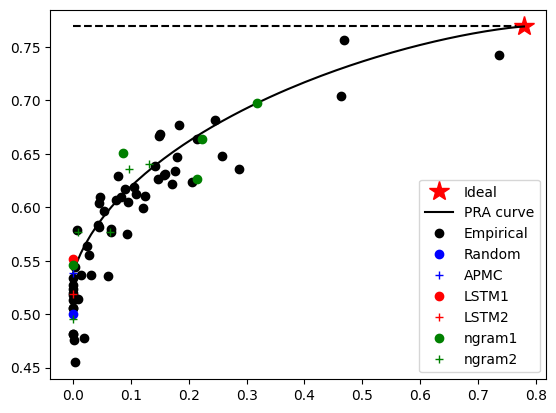

In [ ]:
evenPRA = np.load('EvenProcess_PRA.npz')
even_Rparticipant = evenPRA['R_participant']
even_Aparticipant = evenPRA['D_participant']
even_R = evenPRA['Rs']
even_A = evenPRA['Ds']
# add in all the controls
even_Rrandom = [0]; even_Arandom = [0.5]
even_Rargmax = [0]; even_Aargmax = [0.5381062355658199]
even_RLSTM_noprobmatching = [0]; even_ALSTM_noprobmatching = [0.5514018691588785]
even_RLSTM_probmatching = [7.289035508106778e-05]; even_ALSTM_probmatching = [0.5186915887850467]
even_Rngram_noprobmatching = [0.0,0.3187791725115614,0.08592381874622945,0.2140230858094503,0.2237295050598307]
even_Rngram_probmatching = [3.399370265055879e-06,0.007911581021301961,0.06360649611850833,0.09702967881529534,0.1311389135735881]
even_Angram_noprobmatching = [0.5462962962962963,0.6976744186046512,0.6511627906976745,0.6261682242990654,0.6635514018691588]
even_Angram_probmatching = [0.49537037037037035,0.576744186046511,0.576744186046511,0.6355140186915887,0.6401869158878505]
pl.plot(np.linspace(0,np.max(even_R),100),np.ones(100)*np.max(even_A),'--k')
pl.plot(np.max(even_R),np.max(even_A),'*r',label='Ideal',markersize=15)
pl.plot(even_R,even_A,'-k',label='PRA curve')
pl.plot(even_Rparticipant,even_Aparticipant,'ok',label='Empirical')
pl.plot(even_Rrandom,even_Arandom,'ob',label='Random')
pl.plot(even_Rargmax,even_Aargmax,'+b',label='APMC')
pl.plot(even_RLSTM_noprobmatching,even_ALSTM_noprobmatching,'or',label='LSTM1')
pl.plot(even_RLSTM_probmatching,even_ALSTM_probmatching,'+r',label='LSTM2')
pl.plot(even_Rngram_noprobmatching,even_Angram_noprobmatching,'og',label='ngram1')
pl.plot(even_Rngram_probmatching,even_Angram_probmatching,'+g',label='ngram2')
pl.legend(loc='best')
pl.show()

Text(0, 0.5, 'Accuracy')

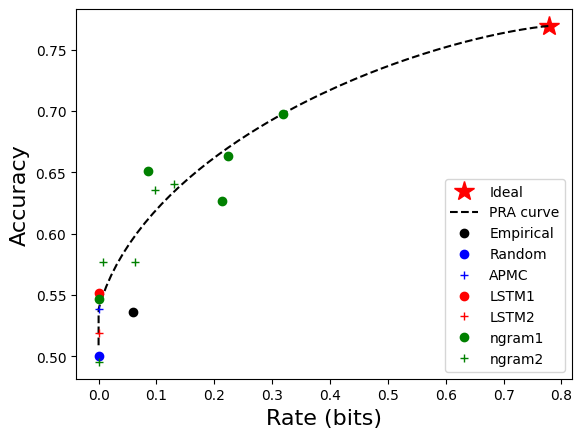

In [ ]:
evenPRA = np.load('EvenProcess_PRA.npz')
even_Rparticipant = evenPRA['R_participant']
even_Aparticipant = evenPRA['D_participant']
even_R = evenPRA['Rs']
even_A = evenPRA['Ds']
even_Rparticipantearly = []
even_Aparticipantearly = []
for i in range(len(even_Rparticipant)):
  if even_earlystoppers[i]:
    even_Rparticipantearly.append(even_Rparticipant[i])
    even_Aparticipantearly.append(even_Aparticipant[i])
# add in all the controls
even_Rrandom = [0]; even_Arandom = [0.5]
even_Rargmax = [0]; even_Aargmax = [0.5381062355658199]
even_RLSTM_noprobmatching = [0]; even_ALSTM_noprobmatching = [0.5514018691588785]
even_RLSTM_probmatching = [7.289035508106778e-05]; even_ALSTM_probmatching = [0.5186915887850467]
even_Rngram_noprobmatching = [0.0,0.3187791725115614,0.08592381874622945,0.2140230858094503,0.2237295050598307]
even_Rngram_probmatching = [3.399370265055879e-06,0.007911581021301961,0.06360649611850833,0.09702967881529534,0.1311389135735881]
even_Angram_noprobmatching = [0.5462962962962963,0.6976744186046512,0.6511627906976745,0.6261682242990654,0.6635514018691588]
even_Angram_probmatching = [0.49537037037037035,0.576744186046511,0.576744186046511,0.6355140186915887,0.6401869158878505]
pl.plot(np.max(even_R),np.max(even_A),'*r',label='Ideal',markersize=15)
pl.plot(even_R,even_A,'--k',label='PRA curve')
pl.plot(even_Rparticipantearly,even_Aparticipantearly,'ok',label='Empirical')
pl.plot(even_Rrandom,even_Arandom,'ob',label='Random')
pl.plot(even_Rargmax,even_Aargmax,'+b',label='APMC')
pl.plot(even_RLSTM_noprobmatching,even_ALSTM_noprobmatching,'or',label='LSTM1')
pl.plot(even_RLSTM_probmatching,even_ALSTM_probmatching,'+r',label='LSTM2')
pl.plot(even_Rngram_noprobmatching,even_Angram_noprobmatching,'og',label='ngram1')
pl.plot(even_Rngram_probmatching,even_Angram_probmatching,'+g',label='ngram2')
pl.legend(loc='best')
pl.xlabel('Rate (bits)',size=16)
pl.ylabel('Accuracy',size=16)

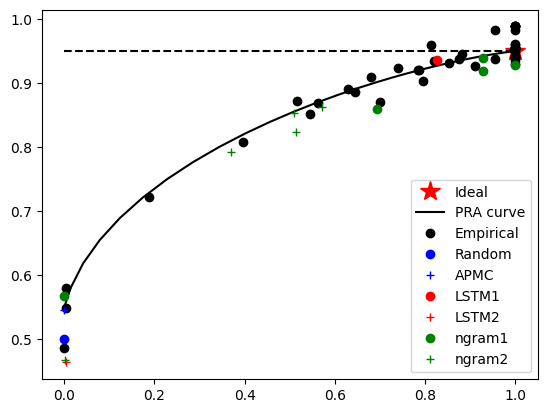

In [ ]:
noisyPRA = np.load('NoisyPeriodic_PRA.npz')
noisy_Rparticipant = noisyPRA['R_participant']
noisy_Aparticipant = noisyPRA['D_participant']
noisy_R = noisyPRA['Rs']
noisy_A = noisyPRA['Ds']
# add in all the controls
noisy_Rrandom = [0]; noisy_Arandom = [0.5]
noisy_Rargmax = [0]; noisy_Aargmax = [0.5460674157303371]
noisy_RLSTM_noprobmatching = [0.8262199125038976]; noisy_ALSTM_noprobmatching = [0.9363636363636364]
noisy_RLSTM_probmatching = [0.002952762635250572]; noisy_ALSTM_probmatching = [0.4636363636363636]
noisy_Rngram_noprobmatching = [0.0,0.6930925963145924,0.9286161267297095,0.9284189173229802,1.0]
noisy_Rngram_probmatching = [0.001171354295115723,0.5138594483586991,0.3698899111107872,0.5085708485336398,0.5704901020119046]
noisy_Angram_noprobmatching = [0.5678391959798995,0.8592964824120602,0.9393939393939394,0.9191919191919192,0.9289340101522843]
noisy_Angram_probmatching = [0.46733668341708545,0.8241206030150754,0.7929292929292929,0.8535353535353535,0.8629441624365483]
pl.plot(np.max(noisy_R),np.max(noisy_A),'*r',label='Ideal',markersize=15)
pl.plot(np.linspace(0,np.max(noisy_R),100),np.ones(100)*np.max(noisy_A),'--k')
pl.plot(noisy_R,noisy_A,'-k',label='PRA curve')
pl.plot(noisy_Rparticipant,noisy_Aparticipant,'ok',label='Empirical')
pl.plot(noisy_Rrandom,noisy_Arandom,'ob',label='Random')
pl.plot(noisy_Rargmax,noisy_Aargmax,'+b',label='APMC')
pl.plot(noisy_RLSTM_noprobmatching,noisy_ALSTM_noprobmatching,'or',label='LSTM1')
pl.plot(noisy_RLSTM_probmatching,noisy_ALSTM_probmatching,'+r',label='LSTM2')
pl.plot(noisy_Rngram_noprobmatching,noisy_Angram_noprobmatching,'og',label='ngram1')
pl.plot(noisy_Rngram_probmatching,noisy_Angram_probmatching,'+g',label='ngram2')
pl.legend(loc='best')
pl.show()

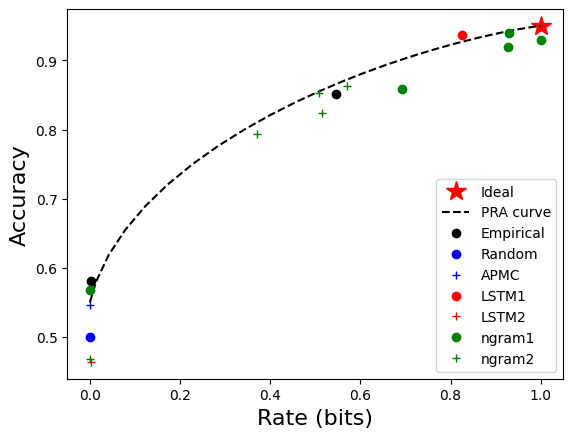

In [ ]:
noisyPRA = np.load('NoisyPeriodic_PRA.npz')
noisy_Rparticipant = noisyPRA['R_participant']
noisy_Aparticipant = noisyPRA['D_participant']
noisy_R = noisyPRA['Rs']
noisy_A = noisyPRA['Ds']
noisy_Rparticipantearly = []
noisy_Aparticipantearly = []
for i in range(len(noisy_Rparticipant)):
  if noisy_earlystoppers[i]:
    noisy_Rparticipantearly.append(noisy_Rparticipant[i])
    noisy_Aparticipantearly.append(noisy_Aparticipant[i])
# add in all the controls
noisy_Rrandom = [0]; noisy_Arandom = [0.5]
noisy_Rargmax = [0]; noisy_Aargmax = [0.5460674157303371]
noisy_RLSTM_noprobmatching = [0.8262199125038976]; noisy_ALSTM_noprobmatching = [0.9363636363636364]
noisy_RLSTM_probmatching = [0.002952762635250572]; noisy_ALSTM_probmatching = [0.4636363636363636]
noisy_Rngram_noprobmatching = [0.0,0.6930925963145924,0.9286161267297095,0.9284189173229802,1.0]
noisy_Rngram_probmatching = [0.001171354295115723,0.5138594483586991,0.3698899111107872,0.5085708485336398,0.5704901020119046]
noisy_Angram_noprobmatching = [0.5678391959798995,0.8592964824120602,0.9393939393939394,0.9191919191919192,0.9289340101522843]
noisy_Angram_probmatching = [0.46733668341708545,0.8241206030150754,0.7929292929292929,0.8535353535353535,0.8629441624365483]
pl.plot(np.max(noisy_R),np.max(noisy_A),'*r',label='Ideal',markersize=15)
pl.plot(noisy_R,noisy_A,'--k',label='PRA curve')
pl.plot(noisy_Rparticipantearly,noisy_Aparticipantearly,'ok',label='Empirical')
pl.plot(noisy_Rrandom,noisy_Arandom,'ob',label='Random')
pl.plot(noisy_Rargmax,noisy_Aargmax,'+b',label='APMC')
pl.plot(noisy_RLSTM_noprobmatching,noisy_ALSTM_noprobmatching,'or',label='LSTM1')
pl.plot(noisy_RLSTM_probmatching,noisy_ALSTM_probmatching,'+r',label='LSTM2')
pl.plot(noisy_Rngram_noprobmatching,noisy_Angram_noprobmatching,'og',label='ngram1')
pl.plot(noisy_Rngram_probmatching,noisy_Angram_probmatching,'+g',label='ngram2')
pl.legend(loc='best')
pl.xlabel('Rate (bits)',size=16)
pl.ylabel('Accuracy',size=16)
pl.show()